# 02. Preparing predictor variable fields

In this tutorial, we'll cover the preparation of the distance to the coastline field using the parameters from another typical predictor variable for air temperatures, altitude. The altitude predictor variable is obtained using a Digital Elevation Model (DEM).

In PyMica, predictor variable fields used for interpolation must have the same extension, spatial resolution, and projection. Therefore, the DEM will be used as a reference to build the others.

### Distance to Coastline

PyMica provides a utility to build a distance to the coastline field using a DEM and a coastline GeoJSON file. Let's now import the necessary modules.

In [1]:
from osgeo import gdal

from pymica.utils.distance_to_coastline import get_dist_array

For the `get_dist_array` function, we need four parameters: projection, geotransform, size, and a coastline file. We'll obtain the first three from the DEM, and the coastline file will be sourced from the explanatory folder.

In [2]:
dem_file = 'sample-data/explanatory/cat_dem_25831.tif'
dem = gdal.Open(dem_file)

projection = 25831
geotransform = dem.GetGeoTransform()
size = [dem.RasterXSize, dem.RasterYSize]
coast_line = 'sample-data/explanatory/cat_coast_line.json'

/home/ecm/anaconda3/envs/pymica-test/lib/python3.10/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Now, let's check the values of each parameter.

In [3]:
print('Geotransform: ', geotransform)
print('Size        : ', size)

Geotransform:  (260000.0, 270.0, 0.0, 4750000.0, 0.0, -270.0)
Size        :  [1000, 970]


Once all the parameters are set, we can call the `get_dist_array` function. First we'll import it from `pymica.utils.distance_to_coastline` and then apply it the previously defined parameters.

In [4]:
dcoast_field = get_dist_array(proj=projection, geotransform=geotransform, size=size, dist_file=coast_line)

Progress: 1.1%

Progress: 100%  


Now, we can get a quick look of the `dcoast_field` array using `matplotlib`.

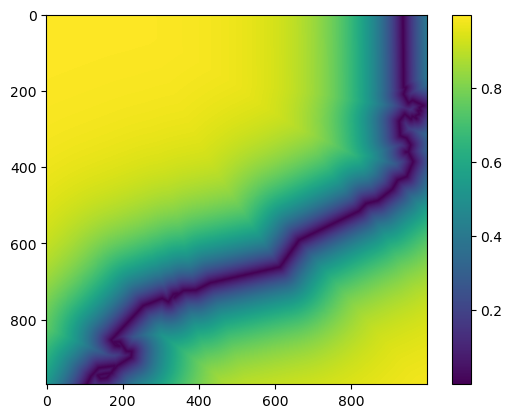

In [5]:
import matplotlib.pyplot as plt

plt.imshow(dcoast_field)
plt.colorbar()
plt.show()

The coastline of Catalonia can be clearly identified. Values close to it are low and exponentially grow as the distance increases from the coast.

Given that the distance to the coastline may be used as a predictor variable, it would be interesting to save it in a raster file for future use in multiple linear regression interpolations.

Then, let's use the `pymica.utils.geotools.get_tif_from_array()` to save the `dcoast_field` into a GeoTIFF file.


In [6]:
from pymica.utils.geotools import get_tif_from_array

ImportError: cannot import name 'get_tif_from_array' from 'pymica.utils.geotools' (/home/ecm/anaconda3/envs/pymica-test/lib/python3.10/site-packages/pymica/utils/geotools.py)